In [1]:
%matplotlib widget

In [2]:
import torch
import matplotlib.pyplot as plt

<img src="img/assign-2/assign_2-1.png" alt="alt text" style="width:15cm;"/>

<img src="img/assign-2/assign_2-1_sub.png" alt="alt text" style="width:15cm;"/>

In [3]:
# particular state index
_list = [5, 10, 15, 20]
# index start from 0
idx_list = [x - 1 for x in _list]

# reward for only action a3 in the state in idx_list, 0 elsewhere
rew = [5, 20, 45, 80]

# different gamma to test
gamma = 0.99

# useful lists
vecV_pi1_list = []
vecV_pi2_list = []

# useful masks
mask_pi1 = torch.zeros(21,21,3, dtype=torch.bool)
mask_pi2 = torch.zeros(21,21,3, dtype=torch.bool)

### Initialization of useful matrix

For the correct computation of $P(s'|s,a)$, it is useful to write $P(s'|s,a)$ as a 3rd-order tensor, where the 3rd dimension corresponds to $P(s'|s,a=a_i)$.  
In general, the definition of $P(s'|s,a)$ as a 3rd-order tensor is an abuse of notation because not all $P(s'|s,a=a_i)$ are defined for all states, because some action can be not abilitated, and for this reason, the sum of probabilities along the rows is not equal to 1.  
Bearing this in mind, for simplicity, the solution of this assignment uses this abuse of notation.  
The compact form of $P(s'|s,a \sim {\pi}_i)$ is equivalent to a 2nd-order tensor, where the single element of $P(s'|s,a \sim \pi_i)$ can be extracted from the general form $P(s'|s,a)$.  
An equivalent analysis can be done for $R(s,a)$, which is generally equivalent to a 2nd-order tensor, but the expected value of reward function following $\pi_i$, namely $\mathbf{E}\left[R(s,a)\right]$, is a column vector.



In [4]:
# initialize matP and mat R
matP = torch.zeros(21,21,3)
matR = torch.zeros(21,3)

# initialize matP for a2 and a3
tmpP2 = torch.zeros(21,21)
tmpP3 = torch.zeros(21,21)

# compute mat P for a1
tmpP1 = torch.eye(21)
# compute mat P for a2
for i in range(21):
    if i == idx_list[-1]:
        pass
    elif i == 20:
        tmpP2[i, i] = 0
    else:
        tmpP2[i, i+1] = 1
# compute mat P for a3 
for i in range(21):
    if i in idx_list:
        tmpP3[i, 20] = 1

# update matP
matP[:,:,0] = tmpP1.clone()
matP[:,:,1] = tmpP2.clone()
matP[:,:,2] = tmpP3.clone()

del tmpP1, tmpP2, tmpP3

In [5]:
# policy 1
for s in range(21):
    if s in idx_list:
        mask_pi1[s,:,2] = True # select a3, without considering state transition
    else:
        mask_pi1[s,:,1] = True # select a2, without considering state transition
# policy 2
for s in range(21):
    if s == idx_list[-1]:
        mask_pi2[s,:,2] = True # select a3
    else:
        mask_pi2[s,:,1] = True # select a2

#print(matP[mask_pi1].view(20,20))
#print(mask_pi1[:,0,:])
matP_pi1 = matP[mask_pi1].view(21,21)
matP_pi2 = matP[mask_pi2].view(21,21)
print("State transition probability matrix for pi1 is \n", matP_pi1.numpy())
print("State transition probability matrix for pi2 is \n", matP_pi2.numpy())

del matP_pi1, matP_pi2

State transition probability matrix for pi1 is 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0

In [6]:
# compute mat R
j = 0
for i in range(21):
    if i == 19:
        matR[i,1] = torch.nan
    if i in idx_list:
        matR[i, 2] = rew[j]
        j = j+1
    else:
        matR[i,2] = torch.nan

print("Reward matrix: \n", matR.numpy())

# compute expected reward
eR_pi1 = matR[mask_pi1[:,0,:]].view(21,1)
eR_pi2 = matR[mask_pi2[:,0,:]].view(21,1)
print("Expected reward for policy 1 is: \n", eR_pi1.numpy())
print("Expected reward for policy 2 is: \n", eR_pi2.numpy())

del eR_pi1, eR_pi2

Reward matrix: 
 [[ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0.  5.]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. 20.]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. 45.]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0.  0. nan]
 [ 0. nan 80.]
 [ 0.  0. nan]]
Expected reward for policy 1 is: 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 5.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [20.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [45.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [80.]
 [ 0.]]
Expected reward for policy 2 is: 
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [80.]
 [ 0.]]


## 1.a

<img src="img/assign-2/1-a.png" alt="alt text" style="width:15cm;"/>

In [7]:
# EXACT VALUE FUNCTION
def exact_value_function(gamma_:float, matR_:torch.Tensor, matP_:torch.Tensor, mask_pi_:torch.Tensor) -> torch.Tensor:
    """ Plot the value function for different gamma values """
    # initialize value function
    vecV_pi = None
    # compute expected reward and state transition probability matrix for the policy
    matP_pi = matP_[mask_pi_].view(21,21)
    eR_pi = matR_[mask_pi_[:,0,:]].view(21,1)
    
    # compute value function for different gamma values
    try:
        # compute exact value function
        vecV_pi = torch.matmul(torch.inverse(torch.eye(21) - gamma_ * matP_pi), eR_pi)
    except:
        # if inverse is not possible
        print(f"Inverse not possible for Gamma = {gamma_}")
        
    return vecV_pi


# compute exact value function
exact_vecV_pi_1 = exact_value_function(gamma, matR, matP, mask_pi1)
exact_vecV_pi_2 = exact_value_function(gamma, matR, matP, mask_pi2)


<img src="img/assign-2/mc-algo.png" alt="alt text" style="width:10cm;"/>

In [8]:
# MONTECARLO
def mc_everyvisit_algo(matP_:torch.Tensor, matR_:torch.Tensor, mask_pi_:torch.Tensor, gamma_:float, iter:int=1000) -> list[torch.Tensor]:
    """ Monte Carlo algorithm to estimate the value function of a policy """
    
    vecV = torch.zeros(21,1) #initial guess of value function
    vecN = torch.zeros(21,1) #initial number of visits
    
    vecV_mem = []
    
    for _ in range(iter):
        
        traj = []   # trajectory of states
        rews = []   # trajectory of rewards
        acts = []   # trajectory of actions
        
        # initial state randomly selected
        state = torch.randint(20,(1,)).item() 
        
        # initial return for the current trajectory
        disc_return = 0
        
        # generate episode using pi
        while state != 20:

            # gather the data
            select_action = torch.where(mask_pi_[state, state, :]==True)[0].item()
            next_state = matP_[state,:,select_action].argmax().item() # select the next state, in this case max operator is used because the policy is deterministic
            reward = matR_[state, select_action]
            if torch.isnan(reward):
                print("Reward is NaN")
            # update lists
            traj.append(state)
            acts.append(select_action)
            rews.append(reward)

            # update state
            state = next_state

        # trajectory length
        ep_T = len(traj)
        
        # update return for all state backwards
        # update value function for all states in the trajectory
        for t in range(ep_T-1, -1, -1):
            # update return    
            s = traj[t]
            # update cumulative return of traj
            disc_return = rews[t] + gamma_*disc_return
            # update number of visits
            vecN[s] += 1
            # update value function
            vecV[s] =  vecV[s] + (1/vecN[s])*(disc_return - vecV[s])
                
        vecV_mem.append(vecV.clone())
        
    return vecV_mem

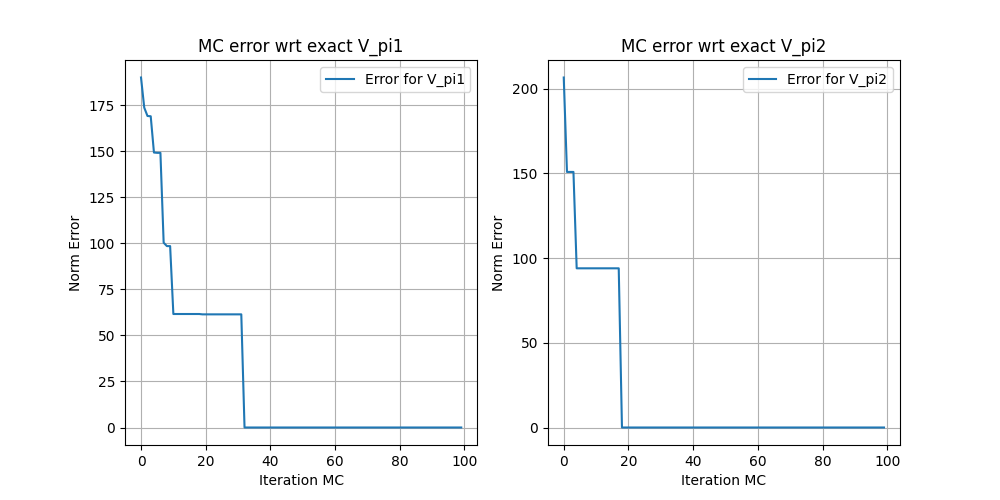

Exact value function for policy 1 is: 
 [ 4.803  4.851  4.901  4.95   5.    19.212 19.406 19.602 19.8   20.
 43.227 43.663 44.104 44.55  45.    76.848 77.624 78.408 79.2   80.
  0.   ]
MC Value function for policy 1 is: 
 [ 4.803  4.851  4.9    4.95   5.    19.212 19.406 19.602 19.8   20.
 43.227 43.663 44.104 44.55  45.    76.848 77.624 78.408 79.2   80.
  0.   ]
Exact value function for policy 2 is: 
 [66.094 66.761 67.435 68.117 68.805 69.5   70.202 70.911 71.627 72.351
 73.081 73.82  74.565 75.318 76.079 76.848 77.624 78.408 79.2   80.
  0.   ]
MC Value function for policy 2 is: 
 [66.093 66.761 67.435 68.117 68.805 69.5   70.202 70.911 71.627 72.351
 73.081 73.82  74.565 75.318 76.079 76.848 77.624 78.408 79.2   80.
  0.   ]


In [9]:
# list of evolution of MC
v1_mc_list = mc_everyvisit_algo(matP, matR, mask_pi1, gamma, iter=100)
v2_mc_list = mc_everyvisit_algo(matP, matR, mask_pi2, gamma, iter=100)

# plot the results
fig = plt.figure(figsize=(10, 5))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax1.plot(torch.norm(torch.stack(v1_mc_list)-exact_vecV_pi_1,dim=1), label="Error for V_pi1")
ax2.plot(torch.norm(torch.stack(v2_mc_list)-exact_vecV_pi_2,dim=1), label="Error for V_pi2")
ax1.grid()
ax2.grid()
ax1.set_title("MC error wrt exact V_pi1")
ax2.set_title("MC error wrt exact V_pi2")
ax1.set_xlabel("Iteration MC")
ax2.set_xlabel("Iteration MC")
ax1.set_ylabel("Norm Error")
ax2.set_ylabel("Norm Error")
ax1.legend()
ax2.legend()
plt.show()

print("Exact value function for policy 1 is: \n", exact_vecV_pi_1.numpy().squeeze().round(3))
print("MC Value function for policy 1 is: \n", v1_mc_list[-1].numpy().squeeze().round(3))
print("Exact value function for policy 2 is: \n", exact_vecV_pi_2.numpy().squeeze().round(3))
print("MC Value function for policy 2 is: \n", v2_mc_list[-1].numpy().squeeze().round(3))

## 1.b

<img src="img/assign-2/1-b.png" alt="alt text" style="width:15cm;"/>

<img src="img/assign-2/1-b_sup.png" alt="alt text" style="width:10cm;"/>

In [10]:
# TD(0)
def td0_algo(matP_:torch.Tensor, matR_:torch.Tensor, mask_pi_:torch.Tensor, gamma_:float, step_size:float=0.1, iter:int=1000) -> list[torch.Tensor]:
    """ Temporal Difference algorithm to estimate the value function of a policy """
    
    vecV = torch.zeros(21,1) #initial guess of value function
    
    vecV_mem = []
    
    for _ in range(iter):
        
        traj = []   # trajectory of states
        rews = []   # trajectory of rewards
        acts = []   # trajectory of actions
        
        # initial state randomly selected
        state = torch.randint(20,(1,)).item() 
        
        # generate episode using pi
        while state != 20:

            # gather the data
            select_action = torch.where(mask_pi_[state, state, :]==True)[0].item()
            next_state = matP_[state,:,select_action].argmax().item() # select the next state, in this case max operator is used because the policy is deterministic
            reward = matR_[state, select_action]
            if torch.isnan(reward):
                print("Reward is NaN")
            # update lists
            traj.append(state)
            acts.append(select_action)
            rews.append(reward)

            td_error = reward + gamma_*vecV[next_state] - vecV[state]
            # update value function
            vecV[state] = vecV[state] + step_size*(td_error)

            # update state
            state = next_state
        vecV_mem.append(vecV.clone())
        
    return vecV_mem

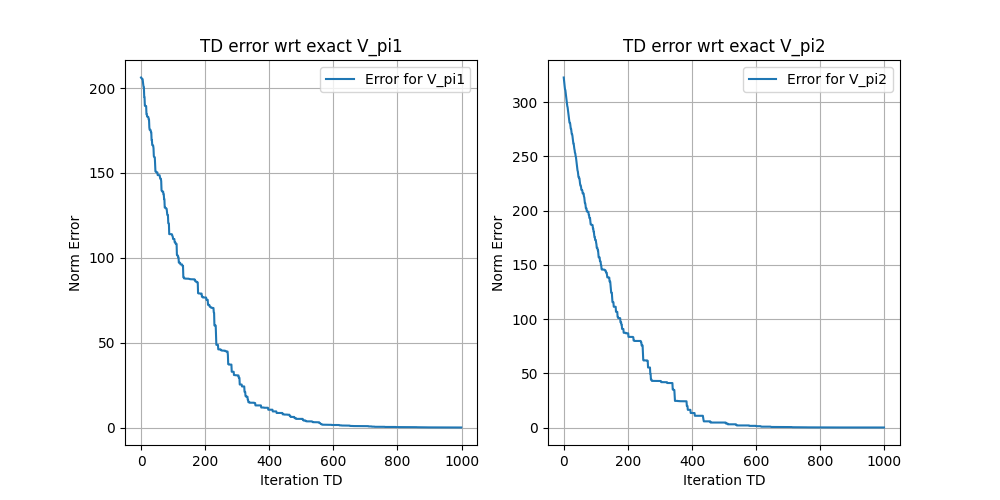

Exact value function for policy 1 is: 
 [ 4.803  4.851  4.901  4.95   5.    19.212 19.406 19.602 19.8   20.
 43.227 43.663 44.104 44.55  45.    76.848 77.624 78.408 79.2   80.
  0.   ]
TD Value function for policy 1 is: 
 [ 4.802  4.851  4.9    4.95   5.    19.207 19.406 19.602 19.8   20.
 43.218 43.663 44.104 44.55  45.    76.819 77.624 78.408 79.2   80.
  0.   ]
Exact value function for policy 2 is: 
 [66.094 66.761 67.435 68.117 68.805 69.5   70.202 70.911 71.627 72.351
 73.081 73.82  74.565 75.318 76.079 76.848 77.624 78.408 79.2   80.
  0.   ]
TD Value function for policy 2 is: 
 [66.086 66.761 67.435 68.116 68.804 69.499 70.201 70.911 71.627 72.35
 73.081 73.819 74.565 75.318 76.079 76.848 77.624 78.408 79.2   80.
  0.   ]


In [11]:
# list of evolution of TD(0)
v1_td0_list = td0_algo(matP, matR, mask_pi1, gamma, step_size=0.2, iter=1000)
v2_td0_list = td0_algo(matP, matR, mask_pi2, gamma, step_size=0.2, iter=1000)

# plot the results
fig = plt.figure(figsize=(10, 5))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax1.plot(torch.norm(torch.stack(v1_td0_list)-exact_vecV_pi_1,dim=1), label="Error for V_pi1")
ax2.plot(torch.norm(torch.stack(v2_td0_list)-exact_vecV_pi_2,dim=1), label="Error for V_pi2")
ax1.grid()
ax2.grid()
ax1.set_title("TD error wrt exact V_pi1")
ax2.set_title("TD error wrt exact V_pi2")
ax1.set_xlabel("Iteration TD")
ax2.set_xlabel("Iteration TD")
ax1.set_ylabel("Norm Error")
ax2.set_ylabel("Norm Error")
ax1.legend()
ax2.legend()
plt.show()

print("Exact value function for policy 1 is: \n", exact_vecV_pi_1.numpy().squeeze().round(3))
print("TD Value function for policy 1 is: \n", v1_td0_list[-1].numpy().squeeze().round(3))
print("Exact value function for policy 2 is: \n", exact_vecV_pi_2.numpy().squeeze().round(3))
print("TD Value function for policy 2 is: \n", v2_td0_list[-1].numpy().squeeze().round(3))

## 1-c

See the script "assign-2-1c.ipynb". 

## 1-f

<img src="img/assign-2/1-f.png" alt="alt text" style="width:15cm;"/>

<img src="img/assign-2/sarsa-algo.png" alt="alt text" style="width:10cm;"/>

In [12]:
def epsilon_greedy_action(matQ_:torch.Tensor, _state:int, _epsilon:float) -> int:
    """ Epsilon greedy action selection """
    
    if torch.rand(1).item() < _epsilon:
        # exploration
        _available_action = torch.nonzero((matQ_[_state, :] != 0))
        _idx_action = _available_action[torch.randint(len(_available_action), (1,))].item()
    else:
        # exploitation
        _idx_action = matQ_[_state,:].argmax().item()
        
    return _idx_action

In [13]:
# SARSA
def sarsa_algo(matP_:torch.Tensor, matR_:torch.Tensor, gamma_:float, epsilon_:float, step_size_:float=0.001,
               epsilon_decay_:float=0.001, alpha_decay_:float=0.001, iter_:int=1000) -> list[torch.Tensor]:
    """ SARSA algorithm to estimate the value function of a policy """
    
    td_error_list_ = []
        
    # initialize action value function
    _matQ = torch.rand(21,3)*0.1 #initial guess of action value function
    
    # use only available action
    _mask_Q = (matP_[:, :, :] != 0).any(dim=1)
    _matQ[~_mask_Q] = 0 
    
    for n_ in range(iter_):
        
        traj = []   # trajectory of states
        rews = []   # trajectory of rewards
        acts = []   # trajectory of actions
        
        # initial state randomly selected
        state_ = torch.randint(20,(1,)).item() 
        
        epsilon_n = epsilon_/(1+epsilon_decay_*n_)
        alpha_ = step_size_/(1+alpha_decay_*n_)
        
        select_action = epsilon_greedy_action(_matQ, state_, epsilon_n)

        # generate episode using pi
        while state_ != 20:
            
            reward = matR_[state_, select_action]

            # update lists
            traj.append(state_)
            acts.append(select_action)
            rews.append(reward)
            
            # next state, action and reward
            next_state = matP_[state_,:,select_action].argmax().item() # select the next state, in this case max operator is used because the policy is deterministic
            next_action = epsilon_greedy_action(_matQ, next_state, epsilon_n)
            
            # compute TD error              
            td_error = reward + gamma_*_matQ[next_state, next_action] - _matQ[state_, select_action]
            td_error_list_.append(td_error)
            
            # update action value function
            _matQ[state_, select_action] = _matQ[state_, select_action] + alpha_*(td_error)
            state_ = next_state
            select_action = next_action
    
    return _matQ, td_error_list_, rews

Best action for each state is a_: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0]
Best policy: 
 tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])


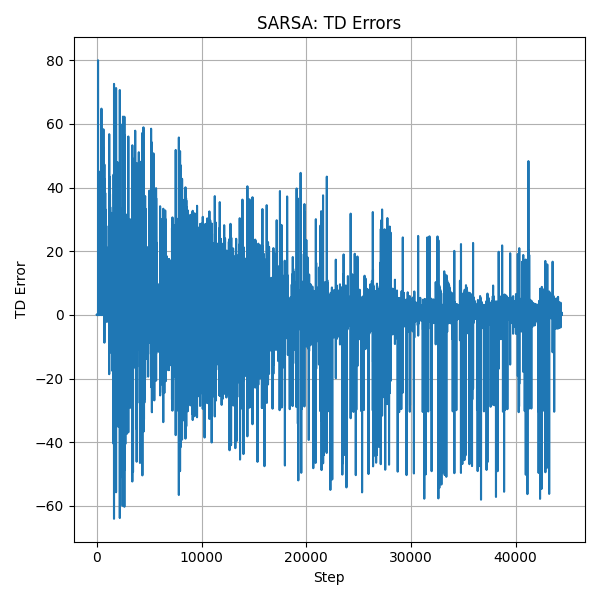

In [14]:
matQ_sarsa, e_sarsa_list, _ = sarsa_algo(matP, matR, gamma, epsilon_=0.1, step_size_=0.1,
                                  epsilon_decay_=0.0, alpha_decay_=0.0001, iter_=5000)
best_action_sarsa = matQ_sarsa.argmax(dim=1)
best_policy_sarsa = torch.zeros(21,3)
best_policy_sarsa[torch.arange(21), best_action_sarsa] = 1

print("Best action for each state is a_: \n", (best_action_sarsa).numpy().squeeze())
print("Best policy: \n", best_policy_sarsa)

plt.figure(figsize=(6, 6))
plt.plot(e_sarsa_list)
plt.title('SARSA: TD Errors')
plt.xlabel('Step')
plt.ylabel('TD Error')
plt.tight_layout()
plt.grid()
plt.show()


<img src="img/assign-2/Q-learning-algo.png" alt="alt text" style="width:10cm;"/>

In [15]:
# Q-learning
def qlearning_algo(matP_:torch.Tensor, matR_:torch.Tensor, gamma_:float, epsilon_:float, step_size_:float=0.001,
               epsilon_decay_:float=0.001, alpha_decay_:float=0.001, iter_:int=1000) -> list[torch.Tensor]:
    """ Q-learning algorithm to estimate the value function of a policy """
    
    td_error_list_ = []
        
    # initialize action value function
    _matQ = torch.rand(21,3)*0.1 #initial guess of action value function
    
    # use only available action
    _mask_Q = (matP_[:, :, :] != 0).any(dim=1)
    _matQ[~_mask_Q] = 0 
    
    for n_ in range(iter_):
        
        traj = []   # trajectory of states
        rews = []   # trajectory of rewards
        acts = []   # trajectory of actions
        
        # initial state randomly selected
        state_ = torch.randint(20,(1,)).item() 
        
        epsilon_n = epsilon_/(1+epsilon_decay_*n_)
        alpha_ = step_size_/(1+alpha_decay_*n_)
        
        select_action = epsilon_greedy_action(_matQ, state_, epsilon_n)

        # generate episode using pi
        while state_ != 20:
            
            reward = matR_[state_, select_action]

            # update lists
            traj.append(state_)
            acts.append(select_action)
            rews.append(reward)
            
            # next state, action and reward
            next_state = matP_[state_,:,select_action].argmax().item() # select the next state, in this case max operator is used because the policy is deterministic
            # select best action wrt Q
            best_action = epsilon_greedy_action(_matQ, next_state, _epsilon=0.0)
            
            # compute TD error              
            td_error = reward + gamma_*_matQ[next_state, best_action] - _matQ[state_, select_action]
            td_error_list_.append(td_error)
            
            # update action value function
            _matQ[state_, select_action] = _matQ[state_, select_action] + alpha_*(td_error)
            state_ = next_state
            # we follow a
            select_action = epsilon_greedy_action(_matQ, state_, epsilon_n)
    
    return _matQ, td_error_list_, rews

Best action for each state is a_: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0]
Best policy: 
 tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [1., 0., 0.]])


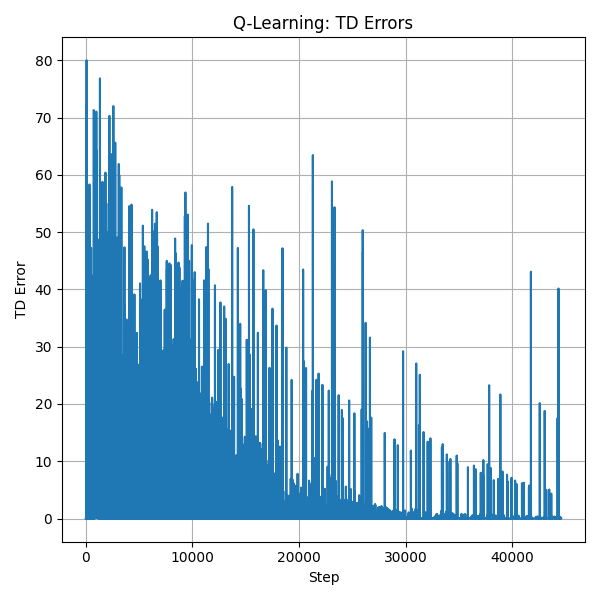

In [17]:
matQ_qlear, e_qlear_list, _ = qlearning_algo(matP, matR, gamma, epsilon_=0.1, step_size_=0.1,
                                  epsilon_decay_=0.0, alpha_decay_=0.0001, iter_=5000)
best_action_qlear = matQ_qlear.argmax(dim=1)
best_policy_qlear = torch.zeros(21,3)
best_policy_qlear[torch.arange(21), best_action_qlear] = 1

print("Best action for each state is a_: \n", (best_action_qlear).numpy().squeeze())
print("Best policy: \n", best_policy_qlear)

plt.figure(figsize=(6, 6))
plt.plot(e_qlear_list)
plt.title('Q-Learning: TD Errors')
plt.xlabel('Step')
plt.ylabel('TD Error')
plt.tight_layout()
plt.grid()
plt.show()
